Este código se realiza para el Proyecto del Modulo 2 (Procesamiento de datos con Python) del Diplomado de Ciencias de Datos 2024.

Autor: Cinthya Simoneen
Fecha: Julio-2024
Temática de la Aplicación: Olimpiadas
Temática de Datos: Información acerca de medallas ganadas por país, atleta, Olimpiada específica (año), tipo de medalla (oro, plata, bronce) y deporte.
Temas por integrar:
- Tipos de datos y operadores.
- Control del flujo, ciclos y condiciones.
- Estructuras de datos y optimización.
- Programación funcional.
- API’s y bases de datos solo si aplica.
- Pandas y análisis Exploratorio de datos.
- Funciones vectorizadas, de agregación y limpieza de
datos.
- Transformación, filtración y ordenamiento de datos.
- Pensamiento crítico y analítico.
- Comunicación efectiva de resultados.

In [249]:
## Importar librerias a usar
import requests
import pandas as pd
import json
import plotly.graph_objects as go



In [250]:
## abrir el csv de PIBS para preparar la información de Productos Internos Brutos por país
df_PIBS=pd.read_csv('C:\BEDU_CIENCIA_DATOS\Modulo2\Proyecto_M2\Data\PIBSXPAIS.csv',delimiter=';', encoding="Latin-1")
df_PIBS

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\CinthyaS\AppData\Local\Temp\ipykernel_24768\963027915.py:2: SyntaxWarning: invalid escape sequence '\B'
  df_PIBS=pd.read_csv('C:\BEDU_CIENCIA_DATOS\Modulo2\Proyecto_M2\Data\PIBSXPAIS.csv',delimiter=';', encoding="Latin-1")


,PAIS,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"611,268","423,993","422,229",no data,no data,no data,no data,no data,no data,no data
1,Albania,"728,36","817,734","824,542","815,529","788,332","788,801","855,724","832,245","805,046",...,"5278,986","6259,762","6657,637","7956,559","8924,317","9474,065","10135,055","10827,923","11578,584","12389,74"
2,Algeria,"2462,085","2502,13","2446,588","2514,256","2640,191","2988,545","2929,092","2935,816","2326,571",...,"3757,585","4169,984","4981,822","5323,635","5721,678","5869,435","5998,622","6073,858","6129,969","6170,756"
3,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"36973,845","41806,876","41378,881","43784,571","44899,596","45570,14","46093,258","46597,511","47098,423","47563,642"
4,Angola,"802,627","731,427","712,576","723,654","747,325","817,068","743,735","828,958","875,526",...,"1709,283","2169,648","3439,391","2565,912","2431,58","2444,365","2455,711","2528,702","2571,26","2617,815"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,West Bank and Gaza,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"3044,744","3464,383","3579,222","3396,263",no data,no data,no data,no data,no data,no data
190,Yemen,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"633,311","594,166","706,25","540,765","486,382","482,333","540,299","615,081","658,072","690,577"
191,Zambia,"764,919","764,864","715,135","598,533","477,314","439,344","293,871","353,589","578,18",...,"958,265","1134,713","1454,826","1380,974","1413,421","1493,054","1573,374","1662,791","1756,875","1853,015"
192,Zimbabwe,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"1769,564","2324,772","1978,323","1993,038","2087,614","2103,128","2130,658","2156,633","2185,572","2210,142"


In [251]:
#Armado y limpieza del DataFrame PIBS con solo los años que se están trabajando (mayor o igual a 2000)

#Se toman solo las series que nos sirven del archivo CSV
df_PIB_Olimpiadas=pd.DataFrame()
df_PIB_Olimpiadas=pd.concat([df_PIBS["PAIS"],
                            df_PIBS["2000"],
                            df_PIBS["2004"],
                            df_PIBS["2008"],
                            df_PIBS["2012"],
                            df_PIBS["2016"],
                            df_PIBS["2020"],
                            df_PIBS["2024"]],axis=1)

#type(df_PIB_Olimpiadas["2000"])
#Valores vacios a cero
df_PIB_Olimpiadas.fillna(0)
#Pasamos los valores no data que vienen en el csv a cero
df_PIB_Olimpiadas['2000'] = df_PIB_Olimpiadas['2000'].str.replace('no data', '0')
df_PIB_Olimpiadas['2004'] = df_PIB_Olimpiadas['2004'].str.replace('no data', '0')
df_PIB_Olimpiadas['2008'] = df_PIB_Olimpiadas['2008'].str.replace('no data', '0')
df_PIB_Olimpiadas['2012'] = df_PIB_Olimpiadas['2012'].str.replace('no data', '0')
df_PIB_Olimpiadas['2016'] = df_PIB_Olimpiadas['2016'].str.replace('no data', '0')
df_PIB_Olimpiadas['2020'] = df_PIB_Olimpiadas['2020'].str.replace('no data', '0')
df_PIB_Olimpiadas['2024'] = df_PIB_Olimpiadas['2024'].str.replace('no data', '0')
#Quitamos las comas
df_PIB_Olimpiadas['2000'] = df_PIB_Olimpiadas['2000'].str.replace(',', '')
df_PIB_Olimpiadas['2004'] = df_PIB_Olimpiadas['2004'].str.replace(',', '')
df_PIB_Olimpiadas['2008'] = df_PIB_Olimpiadas['2008'].str.replace(',', '')
df_PIB_Olimpiadas['2012'] = df_PIB_Olimpiadas['2012'].str.replace(',', '')
df_PIB_Olimpiadas['2016'] = df_PIB_Olimpiadas['2016'].str.replace(',', '')
df_PIB_Olimpiadas['2020'] = df_PIB_Olimpiadas['2020'].str.replace(',', '')
df_PIB_Olimpiadas['2024'] = df_PIB_Olimpiadas['2024'].str.replace(',', '')

#Pasamos los valores de PIB a entero
df_PIB_Olimpiadas['2000'] = df_PIB_Olimpiadas["2000"].astype(int)
df_PIB_Olimpiadas['2004'] = df_PIB_Olimpiadas["2004"].astype(int)
df_PIB_Olimpiadas['2008'] = df_PIB_Olimpiadas["2008"].astype(int)
df_PIB_Olimpiadas['2012'] = df_PIB_Olimpiadas["2012"].astype(int)
df_PIB_Olimpiadas['2016'] = df_PIB_Olimpiadas["2016"].astype(int)
df_PIB_Olimpiadas['2020'] = df_PIB_Olimpiadas["2020"].astype(int)
df_PIB_Olimpiadas['2024'] = df_PIB_Olimpiadas["2024"].astype(int)

df_PIB_Olimpiadas
                

,PAIS,2000,2004,2008,2012,2016,2020,2024
0,Afghanistan,0,254259,447746,784611,617126,611268,0
1,Albania,112764,237358,4370562,4248909,4124405,5278986,8924317
2,Algeria,1947755,283982,5214762,6057974,442658,3757585,5721678
3,Andorra,0,0,0,4571397,39595317,36973845,44899596
4,Angola,681129,1254696,4081718,5083827,3468518,1709283,243158
...,...,...,...,...,...,...,...,...
189,West Bank and Gaza,141275,1350906,1913316,2888598,3325846,3044744,0
190,Yemen,526881,677899,1170964,1369687,1083887,633311,486382
191,Zambia,364026,55605,139378,172958,1250324,958265,1413421
192,Zimbabwe,969824,806898,553376,1310442,1444716,1769564,2087614


In [252]:
#Definir de acuerdo al año, de qué Olimpiada será la 

#Inicio variables
opcion_pais=[]
anio_olimpiada=""
opcion_olimpiada=""

#Usuario elige la Olimpiada que quiere consultar
opcion_pais=["Sidney","Atenas","Beijing","Londres","Tokyo","Rio","Paris"]
opcion_olimpiada = input(f"""Ingrese la Olimpiada que desea: 
    {opcion_pais[0]}
    {opcion_pais[1]}
    {opcion_pais[2]}
    {opcion_pais[3]}
    {opcion_pais[4]}
    {opcion_pais[5]}
""")

match opcion_olimpiada:
    case "Sidney":
        anio_olimpiada="2000"
    case "Atenas":
        anio_olimpiada="2004"
    case "Beijing":
        anio_olimpiada="2008"
    case "Londres":
        anio_olimpiada="2012"            
    case "Rio":
        anio_olimpiada="2016"
    case "Tokyo":
        anio_olimpiada="2020"    
    case "Paris":
        anio_olimpiada="2024"
    case "":  
        anio_olimpiada="2012"  #El default de la API


## Funcion para importar usando una API los datos de los ganadores de las medallas olimpicas (Oro,plata,Bronce)
def carga_datos_API(anio_consulta):
  url = "https://olympic-sports-api.p.rapidapi.com/medals/countries"

  ## querystring = {"year":"2012"} marca el año de la olimpiada, si es inváildo marca 2012 de default
  querystring=  {"year":anio_consulta}

  headers = {
   	"x-rapidapi-key": "30a604f21amshb618d82fe73fc18p10597ejsnd68459afa5b1",
	"x-rapidapi-host": "olympic-sports-api.p.rapidapi.com"
  }

  response = requests.get(url, headers=headers, params=querystring)
  data_response=json.loads(response.text)
  return data_response

  #type(data)
  #print(data)


#cargamos los datos de acuerdo al anio elegido
data=carga_datos_API(anio_olimpiada)



In [253]:
##Importar usando un archivo CSV los datos del producto interno bruto PIB por país

In [254]:
## Manipular la información obtenida por la API
data_olimpiada=data["year"]
data_lideres=data["leaders"]
data_medallas=data["medals"]
#print(data_medallas)


In [255]:
## Obtener series y dataframes
datos={}

#variables tipo lista para armar series del dataframe

lista_paises=[]
lista_medallas_oro=[]
lista_medallas_plata=[]
lista_medallas_bronce=[]
lista_PIB=[]

for registro in data_medallas:
  lista_paises.append(registro["name"])
  lista_medallas_oro.append(registro["medalStandings"]["goldMedalCount"])
  lista_medallas_plata.append(registro["medalStandings"]["silverMedalCount"])
  lista_medallas_bronce.append(registro["medalStandings"]["bronzeMedalCount"])
  lista_PIB.append(0)

#print(len(lista_paises)) 
datos=lista_paises
serie_paises=pd.Series(datos)
serie_paises

#print(len(lista_medallas_oro)) 
datos=lista_medallas_oro
serie_medallas_oro=pd.Series(datos)
serie_medallas_oro

#print(len(lista_medallas_plata)) 
datos=lista_medallas_plata
serie_medallas_plata=pd.Series(datos)
serie_medallas_plata

#print(len(lista_medallas_bronce)) 
datos=lista_medallas_bronce
serie_medallas_bronce=pd.Series(datos)
serie_medallas_bronce

#print(len(lista_medallas_bronce)) 
datos=lista_PIB
serie_PIB=pd.Series(datos)
serie_PIB


0     0
1     0
2     0
3     0
4     0
     ..
80    0
81    0
82    0
83    0
84    0
Length: 85, dtype: int64

In [256]:
# Algunas características de las series creadas
print(serie_medallas_bronce.shape) 
print(serie_medallas_oro.size) 
print(serie_medallas_plata.dtype) 
print(serie_medallas_oro.index) 
print(serie_medallas_plata.values)

(85,)
85
int64
RangeIndex(start=0, stop=85, step=1)
[29 27 26 17 19 14 16 11  8  9  6  5  4  5 10  5  3  1  2  5  4  5  4  3
  2  2  5  4  4  3  1  3  3  0  2  1  2  2  1  1  2  2  1  1  1  1  0  1
  1  0  2  1  1  1  1  0  2  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  0  0  0  0  0  0  0]


In [257]:
# Con las listas armadas al recorrer la información de la API, obtenemos el DataFrame
datos={"Pais":lista_paises,"Medallas_Oro":lista_medallas_oro,"Medallas_Plata":lista_medallas_plata,"Medallas_Bronce":lista_medallas_bronce,"PIB":lista_PIB}
df=pd.DataFrame(datos)
df.head(10)

,Pais,Medallas_Oro,Medallas_Plata,Medallas_Bronce,PIB
0,United States,46,29,29,0
1,China,38,27,23,0
2,Russia,24,26,32,0
3,Great Britain,29,17,19,0
4,Germany,11,19,14,0
5,Japan,7,14,17,0
6,Australia,7,16,12,0
7,France,11,11,12,0
8,South Korea,13,8,7,0
9,Italy,8,9,11,0


In [258]:
#De acuerdo a la Olimpiada seleccionada se modifica el valor de la serie df[PIB] para hacer los comparativos

#funcion que busca el valor del PIB en el df_PIB_Olimpiadas y actaualiza en el df de medallas (df)
def pibPais(pais,pib_anio):
  pib =0
  try:
    serie_pib_pais = pd.Series(df_PIB_Olimpiadas["PAIS"])
    indice_df_pib = list(serie_pib_pais).index(pais)

    serie_pib_anio = pd.Series(df_PIB_Olimpiadas[pib_anio])
    pib=serie_pib_anio[indice_df_pib]

    serie_pais_medallas = pd.Series(df["Pais"])
    indice_df_medallas  = list(serie_pais_medallas).index(pais)
    #como resultado se tiene el indice a modificar del df de medallas y el pib
    resultado=(pib,indice_df_medallas)
    
  except:
    resultado=(0,0)
  return resultado  



for registro in df["Pais"]:
  pib_pais,indice_pais=pibPais(registro,"2012")
  df.loc[indice_pais, "PIB"]=pib_pais


df = df.sort_values("PIB", ascending=False)
df.head(10)

,Pais,Medallas_Oro,Medallas_Plata,Medallas_Bronce,PIB
64,Qatar,0,0,2,101933117
42,Norway,2,1,1,101779186
41,Switzerland,2,2,0,86284413
6,Australia,7,16,12,68485597
27,Denmark,2,4,3,58623414
28,Sweden,1,4,3,57816023
63,Singapore,0,0,2,55547546
13,Canada,1,5,12,52745057
10,Netherlands,6,6,8,50175559
5,Japan,7,14,17,49175035


In [259]:
df_conjunto=df.merge(df_PIB_Olimpiadas, left_on='Pais', right_on='PAIS',
          suffixes=('PIB_left', 'PIB_right'))

df_conjunto.head(10)

,Pais,Medallas_Oro,Medallas_Plata,Medallas_Bronce,PIB,PAIS,2000,2004,2008,2012,2016,2020,2024
0,Qatar,0,0,2,101933117,Qatar,30461311,42548115,72484634,101933117,57965377,50962499,81399515
1,Norway,2,1,1,101779186,Norway,38094597,57676821,97119989,101779186,7062925,68275277,94659918
2,Switzerland,2,2,0,86284413,Switzerland,38978168,54774352,74662365,86284413,82575989,86105978,105668981
3,Australia,7,16,12,68485597,Australia,2091076,32871417,49205307,68485597,51829835,53252586,66589055
4,Denmark,2,4,3,58623414,Denmark,30798717,46571283,64531119,58623414,54862848,60926877,68897547
5,Sweden,1,4,3,57816023,Sweden,29589141,42736876,55929862,57816023,51590473,52706294,58528523
6,Singapore,0,0,2,55547546,Singapore,23852834,27608075,40008577,55547546,56899903,61466819,88446924
7,Canada,1,5,12,52745057,Canada,24296721,32178496,46773744,52745057,42382499,43573195,54866046
8,Netherlands,6,6,8,50175559,Netherlands,26327867,404773,58015396,50175559,46165177,52222364,63749903
9,Japan,7,14,17,49175035,Japan,39172971,38307103,3999206,49175035,39411424,40171929,33138163


C:\Users\CinthyaS\AppData\Local\Temp\ipykernel_24768\75627580.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Medallas')


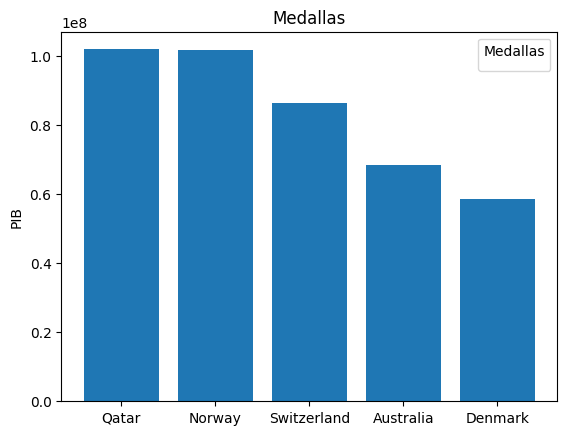

In [260]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

muestra=df_conjunto[:5]
muestra.copy

medallas =muestra["PAIS"]
pib =muestra["2012"]

ax.bar(medallas, pib)

ax.set_ylabel('PIB')
ax.set_title('Medallas')
ax.legend(title='Medallas')

plt.show()

C:\Users\CinthyaS\AppData\Local\Temp\ipykernel_24768\2807184779.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Medallas')


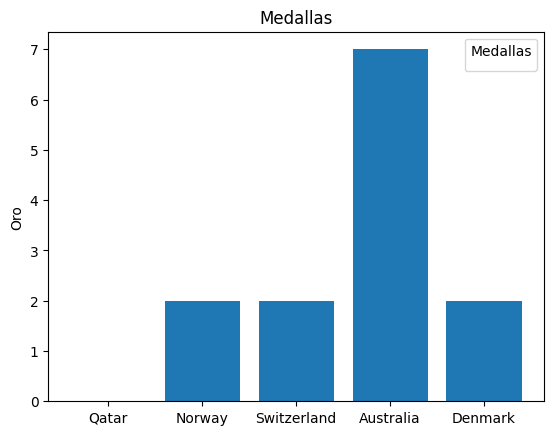

In [261]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

muestra=df_conjunto[:5]
muestra.copy

medallas =muestra["PAIS"]
pib =muestra["Medallas_Oro"]

ax.bar(medallas, pib)

ax.set_ylabel('Oro')
ax.set_title('Medallas')
ax.legend(title='Medallas')

plt.show()